<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#C00000 ;font-family:newtimeroman;color:white;font-size:300%;text-align:center;border-radius:60px 1px;">  Flowers Classification | CNN & Mobilnet  </p>
    
 <p style="padding: 10px;
          color:black;
          font-size:220%;
          font-family:Serif;
          text-align:center;">   
Using Deep Learning Convolutional Neural Network and Transfer Learning MobilNet Model in Flowers' Images Classification Problem
  </p>
        


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#A21212;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:150%;
          text-align:center;">
Import libraries
</p>
</div>

In [1]:
import tensorflow as tf
from tensorflow import keras
import PIL
import cv2

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

-----------------------
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#A21212;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:150%;
          text-align:center;">
Read Data
</p>
</div>


In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

dataset_dir = keras.utils.get_file(fname = 'flower_photos' , origin = dataset_url , cache_dir='.',untar=True)


--------------------
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#A21212;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:150%;
          text-align:center;">
Images preparation
</p>
</div>

In [3]:
import pathlib

datadir = pathlib.Path(dataset_dir)
datadir

PosixPath('datasets/flower_photos')

In [4]:
flowers = {'daisy' : list(datadir.glob("daisy/*")),
'dandelion' : list(datadir.glob("dandelion/*")),
'roses' : list(datadir.glob("roses/*")),
'sunflowers' : list(datadir.glob("sunflowers/*")),
'tulips' : list(datadir.glob("tulips/*"))}

lables = {
    'daisy' : 0 ,
    'dandelion' : 1 ,
    'roses' : 2,
    'sunflowers' : 3 ,
    'tulips' :4
}

-----------------
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#A21212;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:150%;
          text-align:center;">
Visualize  Images Types
</p>

<p style="background-color:#C00000;color:white;font-size:215%;letter-spacing:0.5px;font-family:Bahnschrift Light; text-align:center;"> Daisy</p>

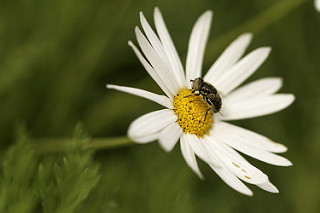

In [5]:

PIL.Image.open(str(flowers['daisy'][0]))


<p style="background-color:#C00000;color:white;font-size:215%;letter-spacing:0.5px;font-family:Bahnschrift Light; text-align:center;"> Dandelion</p>

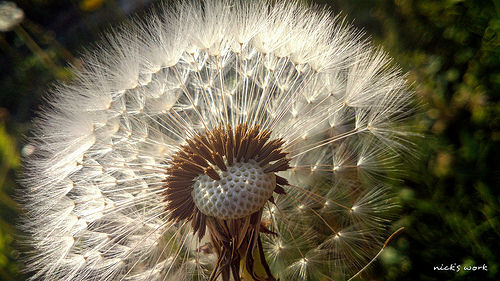

In [6]:
PIL.Image.open(str(flowers['dandelion'][0]))

<p style="background-color:#C00000;color:white;font-size:215%;letter-spacing:0.5px;font-family:Bahnschrift Light; text-align:center;"> Roses</p>

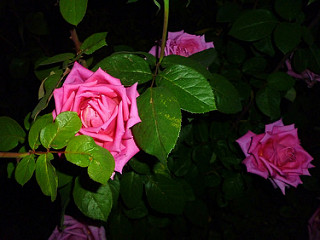

In [7]:
PIL.Image.open(str(flowers['roses'][8]))

<p style="background-color:#C00000;color:white;font-size:215%;letter-spacing:0.5px;font-family:Bahnschrift Light; text-align:center;"> Sunflowers</p>

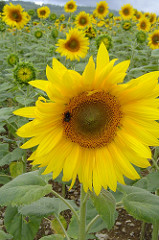

In [8]:
PIL.Image.open(str(flowers['sunflowers'][10]))

<p style="background-color:#C00000;color:white;font-size:215%;letter-spacing:0.5px;font-family:Bahnschrift Light; text-align:center;"> Tulips</p>

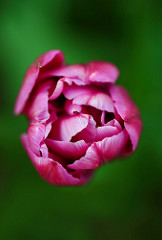

In [9]:
PIL.Image.open(str(flowers['tulips'][6]))

--------------------
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#A21212;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:150%;
          text-align:center;">
Extract images' data and lables
</p>

In [10]:
x =[]
y = []

for image_name , image in flowers.items():
  for img in image :
    img = cv2.imread(str(img)) # converts image form its dir to np array to represent image
    resized = cv2.resize(img , (224,224))
    x.append(resized)
    y.append(lables[image_name])

In [11]:
x = np.array(x)
y = np.array(y)


In [12]:
x_train , x_test , y_train , y_test  = train_test_split(x,y , test_size=.2 , stratify = y)

In [13]:
# scalin data
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

--------------------
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#A21212;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:150%;
          text-align:center;">
 Build Neural Network [CNN]
</p>

In [14]:
import tensorflow as tf
from tensorflow import keras

# Create data augmentation pipeline
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip('horizontal', input_shape=(224, 224, 3)),  # Flip images horizontally
    keras.layers.RandomRotation(0.2),  # Rotate images randomly within a certain degree range
    keras.layers.RandomZoom(0.2)  # Zoom images randomly
])


In [15]:
model = keras.models.Sequential([

    data_augmentation,

    keras.layers.Conv2D(filters = 16,kernel_size = (3,3) , activation = 'relu',padding = 'same'),
    keras.layers.MaxPool2D((3,3)),
    keras.layers.Conv2D(filters = 32,kernel_size = (3,3) , activation = 'relu'),
    keras.layers.MaxPool2D((3,3)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(filters = 64,kernel_size = (3,3) , activation = 'relu',padding = 'same'),
    keras.layers.MaxPool2D((3,3)),
    keras.layers.Conv2D(filters = 128,kernel_size = (3,3) , activation = 'relu',padding = 'same'),
    keras.layers.MaxPool2D((3,3)),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(32,activation = 'relu'),
    keras.layers.Dense(5,activation = 'softmax')
])


In [16]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


In [17]:
model.fit(x_train_scaled,y_train , epochs = 15)

Epoch 1/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.2651 - loss: 1.5657
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.4078 - loss: 1.3574
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.5698 - loss: 1.0471
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.5686 - loss: 1.0351
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.6091 - loss: 0.9545
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.6243 - loss: 0.9001
Epoch 7/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.6489 - loss: 0.8505
Epoch 8/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.6622 - loss: 0.8366
Epoch 9/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.6629 - loss: 0.8155
Epoch 10/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.6924 - loss: 0.7673
Epoch 11/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.6763 - loss: 0.7961
Epoch 12/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy:

In [18]:
model.evaluate(x_test_scaled,y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 376ms/step - accuracy: 0.7070 - loss: 0.7430


[0.7686647772789001, 0.7057220935821533]

In [19]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras


In [20]:
print(tf.__version__)  # Should be 2.x
print(hub.__version__)  # Should be compatible with TensorFlow 2.x


2.17.1
0.16.1


In [21]:
pip install --upgrade tensorflow tensorflow_hub


  Using cached tensorflow-2.18.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)


In [22]:
import tensorflow as tf
import tensorflow_hub as hub

print("TensorFlow Version:", tf.__version__)
print("TensorFlow Hub Version:", hub.__version__)


TensorFlow Version: 2.17.1
TensorFlow Hub Version: 0.16.1


In [23]:
import tensorflow as tf

input_tensor = tf.keras.Input(shape=(224, 224, 3))


In [24]:
import tensorflow as tf
print(tf.__version__)


2.17.1


In [25]:
from tensorflow.keras.applications import MobileNet

mobilenet_model = MobileNet(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
output = mobilenet_model(input_tensor)


In [26]:
# Assuming train_images and train_labels are your training dataset and labels
# model.fit(train_images, train_labels, epochs=10, batch_size=32)

In [27]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras

# Create the pretrained model using MobileNetV2 from TensorFlow Hub
pretrained_layer = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", input_shape=(224, 224, 3))




In [28]:
import tensorflow as tf
import tensorflow_hub as hub

print(f"TensorFlow version: {tf.__version__}")
print(f"TensorFlow Hub version: {hub.__version__}")


TensorFlow version: 2.17.1
TensorFlow Hub version: 0.16.1


In [29]:
import tensorflow as tf
from tensorflow import keras

# Load the pre-trained model (for example, MobileNetV2 without the top classification layer)
pretrained_layer = keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the layers of the pre-trained model to prevent them from being updated during training
pretrained_layer.trainable = False

# Build the final model
model = keras.Sequential([
    pretrained_layer,  # Add the pre-trained model
    keras.layers.GlobalAveragePooling2D(),  # Pooling layer to reduce dimensionality
    keras.layers.Dense(5, activation='softmax')  # Final dense layer with softmax activation for 5 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [30]:
pretrained_model = keras.Sequential([
    pretrained_layer ,
    keras.layers.Dense(5,activation = 'softmax')
])

In [31]:
pretrained_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [32]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [33]:
# If using one-hot encoded labels, use categorical crossentropy
pretrained_model.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])



In [ ]:
pretrained_model.fit(x_train_scaled, y_train,epochs = 5)

In [ ]:
x_train = # your training features
y_train = # your training labels


SyntaxError: invalid syntax (<ipython-input-2-5ae0f798679e>, line 1)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assume x_train contains the raw training data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)


NameError: name 'x_train' is not defined

In [ ]:
pretrained_model.fit(x_train_scaled, y_train,epochs = 10)

NameError: name 'pretrained_model' is not defined

In [ ]:
pretrained_model.evaluate(x_test_scaled,y_test)

NameError: name 'pretrained_model' is not defined

 <p style="padding: 10px;
          color:#C00000;
          font-size:220%;
          font-family:Serif;
          text-align:center;">   
_______________________________________________
  </p>
<p style="padding: 10px;
          color:black;
          font-size:180%;
          font-family:Serif;
          text-align:center;">   
We got [0.90] test accuracy from MobilNet model , there is high difference in performance and accuracy  !
     </p>